In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from jellyfish import jaro_winkler_similarity
def compare_names(name1, name2):
    """Compare two names using Jaro-Winkler similarity"""
    if pd.isna(name1) or pd.isna(name2):
        return None
    return jaro_winkler_similarity(str(name1), str(name2))
if __name__ == "__main__":
    # Example usage
    name1 = "PERRETTE"
    name2 = "PERRETTE"
    similarity = compare_names(name1, name2)
    print(f"Jaro Winkler comparison between '{name1}' and '{name2}': {similarity}")


Jaro Winkler comparison between 'PERRETTE' and 'PERRETTE': 1.0


In [4]:
#raw_data = pd.read_csv("./DD_namematching_test_013125.csv",dtype=str)
raw_data = pd.read_csv("./gbos_dd_sample_2024_02.txt",delimiter='\t',dtype=str)
pd.set_option("display.max_columns", 500)
raw_data.head()

,accountidentifier,achbatchkey,achtransactionidentifier,achcategorykey,createdate,achcustomername,achlastname,firstname,middlename,lastname,transamount
0,D9A4CE01-3E3C-4474-B15C-ACEB7391919A,27501976,A39AC54C-78A0-4B4A-9613-6F7B78D45D66,7,2024-05-17 01:35:41,"THOMAS,JAVION J",THOMAS,JAVION,NaN,THOMAS,303.0700
1,BC460E7C-5CAC-4661-B0B0-74F4B9E27DA5,33346501,4B5A2288-AA66-464E-8B46-3F4195384E8B,7,2024-11-26 01:32:07,Stewart Subani,Stewart,Subani,NaN,Stewart,308.9400
2,582BE051-3C79-4ECF-90A9-BDFC3FC8904C,31952969,E89BAAC3-5407-4681-BFF2-E5F960E1FFB0,8,2024-10-11 14:44:29,NaN,Stambaugh,Kaulauni,NaN,Stambaugh,107.0000
3,6C854644-541B-42A4-8053-01A731CA1DBB,24548304,64AE2A8B-56BD-42F9-AD18-462FF3F1D670,11,2024-02-02 01:32:58,CRAIG MANNING,Manning,Craig,NaN,Manning,69.2600
4,4493C2C0-6C58-4D66-8ED4-7169331591EA,27695784,94D11C33-F71F-4B95-AC4E-80CA1BB9DFFA,7,2024-05-24 01:33:41,"MIHAY, AUBRIANNA",Mihay,Aubrianna,NaN,Mihay,700.0000


In [5]:
raw_data.describe()

,accountidentifier,achbatchkey,achtransactionidentifier,achcategorykey,createdate,achcustomername,achlastname,firstname,middlename,lastname,transamount
count,20000,20000,20000,20000,20000,19905,20000,20000,0,20000,20000
unique,18838,17621,20000,7,1348,18990,9496,7559,0,9497,14032
top,3996306D-95F6-4436-8255-574ECCA4D3F7,34356206,77670090-DC38-4439-B15E-E48065B2B9D4,7,2024-12-24 08:31:41,Auth,Smith,Michael,NaN,Smith,0.0000
freq,30,13,1,12033,124,50,176,161,NaN,176,521


In [29]:
#nan ach names
raw_data[raw_data.achcustomername.isnull()]

,accountidentifier,achbatchkey,achtransactionidentifier,createdate,achcustomername,achlastname,firstname,middlename,lastname,transamount
1439,FD7992D4-F9B4-4264-847A-119638BC3AA0,33500615,CE3EBDA5-1A1F-4C1D-BE2A-6C9460D07893,2024-12-02 01:31:50,NaN,DENTON,JANET,NaN,DENTON,0.0000
2042,65ECE535-0581-4C71-BC28-B7ED41290614,24311108,2D68DD9E-861F-491C-BA83-C3DD71D7AB58,2024-01-24 08:31:10,NaN,Popple,edward,NaN,Popple,585.7100
3442,D328AAB9-8650-4E6B-B58F-6BB4CF36182F,31250026,4ED5FE1C-41BB-43B4-963D-444218A0A1FC,2024-09-20 01:34:26,NaN,SLAUGHTER,SHANEL,NaN,SLAUGHTER,393.8900
4837,DFC60927-44C2-4303-9CC7-9F9F11C4640E,28718887,498B9618-7D77-4977-9041-7469ADF8EC7A,2024-06-28 01:31:25,NaN,Wilson,Tyrone,NaN,Wilson,1726.8000
9928,F47F82F6-AD66-4763-B032-173BCFB84060,28251105,14F2F9C9-BEFB-4173-BFC0-331D42ACE782,2024-06-12 08:29:23,NaN,MIN,KYUNGWOOK,NaN,MIN,13.3000
10823,B25CD316-EB97-4F29-A00E-5A90FD363FDD,30320083,AC4BFED8-93F3-4E21-8839-FC34BF3D73AE,2024-08-21 14:50:12,NaN,Bullock,Robert,NaN,Bullock,153.6400
16280,7ABE1E60-9857-4EB7-8996-8067A75EE9DD,29405734,59293A20-0E65-406A-BBB1-55F5540B4A75,2024-07-22 08:50:24,NaN,Jacques,Jerry,NaN,Jacques,19.5000
16551,275B6B8B-9594-41F7-9E96-52761C67201A,31850871,B06FBF78-F4CD-4618-AA86-48D4066E3506,2024-10-09 08:31:29,NaN,MILLER,NICOLE,NaN,MILLER,1526.6300


In [6]:
raw_data.isna().sum()

accountidentifier               0
achbatchkey                     0
achtransactionidentifier        0
achcategorykey                  0
createdate                      0
achcustomername                95
achlastname                     0
firstname                       0
middlename                  20000
lastname                        0
transamount                     0
dtype: int64

In [7]:
raw_data.dtypes

accountidentifier           object
achbatchkey                 object
achtransactionidentifier    object
achcategorykey              object
createdate                  object
achcustomername             object
achlastname                 object
firstname                   object
middlename                  object
lastname                    object
transamount                 object
dtype: object

In [8]:
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z]','', text)
    return text

def upper_text(text):
    if isinstance(text, str):
        return re.upper()
    return text

In [17]:
nm_cleaned=raw_data[['achcustomername','achlastname','firstname','middlename','lastname']].map(clean_text)
raw_data['createdt']=pd.to_datetime(raw_data['createdate'])
raw_data['transamount'] = pd.to_numeric(raw_data['transamount'])
df_cleaned = raw_data[['accountidentifier','achbatchkey','achcategorykey','achtransactionidentifier','createdt','transamount']].join(nm_cleaned)

df_cleaned.head()

,accountidentifier,achbatchkey,achcategorykey,achtransactionidentifier,createdt,transamount,achcustomername,achlastname,firstname,middlename,lastname
0,D9A4CE01-3E3C-4474-B15C-ACEB7391919A,27501976,7,A39AC54C-78A0-4B4A-9613-6F7B78D45D66,2024-05-17 01:35:41,303.07,THOMASJAVIONJ,THOMAS,JAVION,NaN,THOMAS
1,BC460E7C-5CAC-4661-B0B0-74F4B9E27DA5,33346501,7,4B5A2288-AA66-464E-8B46-3F4195384E8B,2024-11-26 01:32:07,308.94,StewartSubani,Stewart,Subani,NaN,Stewart
2,582BE051-3C79-4ECF-90A9-BDFC3FC8904C,31952969,8,E89BAAC3-5407-4681-BFF2-E5F960E1FFB0,2024-10-11 14:44:29,107.00,NaN,Stambaugh,Kaulauni,NaN,Stambaugh
3,6C854644-541B-42A4-8053-01A731CA1DBB,24548304,11,64AE2A8B-56BD-42F9-AD18-462FF3F1D670,2024-02-02 01:32:58,69.26,CRAIGMANNING,Manning,Craig,NaN,Manning
4,4493C2C0-6C58-4D66-8ED4-7169331591EA,27695784,7,94D11C33-F71F-4B95-AC4E-80CA1BB9DFFA,2024-05-24 01:33:41,700.00,MIHAYAUBRIANNA,Mihay,Aubrianna,NaN,Mihay


In [10]:
df_cleaned.dtypes

accountidentifier                   object
achbatchkey                         object
achtransactionidentifier            object
createdt                    datetime64[ns]
transamount                        float64
achcustomername                     object
achlastname                         object
firstname                           object
middlename                         float64
lastname                            object
dtype: object

In [7]:
#df_cleaned['JW_fnm_score']=df_cleaned.apply(lambda row: compare_names(row['ach_firstname'],row['firstname']),axis=1)

In [48]:
df_cleaned['JW_lnm_score']=df_cleaned.apply(lambda row: compare_names(row['achlastname'].upper(),row['lastname'].upper()),axis=1)

In [54]:
df_cleaned.dtypes

accountidentifier                   object
achbatchkey                         object
achtransactionidentifier            object
createdt                    datetime64[ns]
transamount                        float64
achcustomername                     object
achlastname                         object
firstname                           object
middlename                         float64
lastname                            object
JW_lnm_score                       float64
fullname                            object
fullname_reverse                    object
dtype: object

In [10]:
#df_cleaned['ach_fullname']=df_cleaned[['ach_firstname','ach_lastname']].fillna('').agg(''.join,axis=1)


In [18]:
df_cleaned['fullname']=df_cleaned[['firstname','lastname']].fillna('').agg(''.join,axis=1)
df_cleaned['fullname_reverse']=df_cleaned[['lastname','firstname']].fillna('').agg(''.join,axis=1)

df_cleaned['fullname']=df_cleaned['fullname'].str.upper()
df_cleaned['fullname_reverse']=df_cleaned['fullname_reverse'].str.upper()
df_cleaned['achcustomername']=df_cleaned['achcustomername'].str.upper()

df_cleaned['JW_fullnm_score1']=df_cleaned.apply(lambda row: compare_names(row['achcustomername'],row['fullname']),axis=1)
#compare reversed name
df_cleaned['JW_fullnm_score2']=df_cleaned.apply(lambda row: compare_names(row['achcustomername'],row['fullname_reverse']),axis=1)

In [12]:
df_cleaned.loc[(df_cleaned.JW_fullnm_score1<=.8)&(df_cleaned.JW_fullnm_score2<=0.8)].head(50)

,accountidentifier,achbatchkey,achtransactionidentifier,createdt,transamount,achcustomername,achlastname,firstname,middlename,lastname,fullname,fullname_reverse,JW_fullnm_score1,JW_fullnm_score2
6,091FD72B-B2EF-40EF-8B15-6DA229FD501D,26668915,92703BBC-AA78-49E1-B3BC-8BFB9E274E59,2024-04-19 01:31:55,60.40,KATELYNHOOD,Pierce,Jesse,NaN,Pierce,JESSEPIERCE,PIERCEJESSE,0.393939,0.393939
14,F153F077-44AB-4830-9073-5F689A3D626F,33160592,BF1C6459-180D-4F0D-828A-8F3B4EC17139,2024-11-20 01:33:02,0.13,MICHAELGREENE,CAROONES,SIERRA,NaN,CAROONES,SIERRACAROONES,CAROONESSIERRA,0.536630,0.574481
45,3B0962B9-9D1A-4E98-ACFA-E595B287556F,27196037,68994692-522C-4B33-995F-98DA18A867BA,2024-05-07 14:44:44,896.39,CHARLESBROUSSARD,Joseph,Lendric,NaN,Joseph,LENDRICJOSEPH,JOSEPHLENDRIC,0.445513,0.445513
51,8C5036BF-606E-46BB-A6C3-5A3C0608E855,30979955,7A971465-575A-412F-A6C6-DB0006326A48,2024-09-11 17:41:46,713.97,BISHOPSAMANTHA,Justice,Randall,NaN,Justice,RANDALLJUSTICE,JUSTICERANDALL,0.440476,0.438095
83,8BB3D7DE-6AE9-43D3-B8BE-BAEE1A9D4297,34144264,0F834036-8D87-461D-B725-B37331902136,2024-12-18 08:30:54,45.99,,Arrington,Derrick,NaN,Arrington,DERRICKARRINGTON,ARRINGTONDERRICK,0.000000,0.000000
101,06779D2F-71CA-4EA5-A651-DB4CDB9D0785,34021658,5BA27131-18F2-4D25-88BC-46C6141D5543,2024-12-16 01:30:55,254.99,,Queenan,Brian,NaN,Queenan,BRIANQUEENAN,QUEENANBRIAN,0.000000,0.000000
113,95F628AB-4DC5-4355-BE6D-A6C71AAC9433,24619368,70623A99-8402-4812-9CCF-53F222626383,2024-02-05 08:32:40,72.62,GOBANK,LOVE,JESSICA,NaN,LOVE,JESSICALOVE,LOVEJESSICA,0.419192,0.419192
123,2751BEDC-7779-4918-B3CC-3624FDBB4B4F,31196956,EE646046-F089-4C4E-AB22-07F44F76F779,2024-09-18 17:43:05,0.06,CRISTINAARCANGEL,HILL,REBECCA,NaN,HILL,REBECCAHILL,HILLREBECCA,0.529040,0.455682
164,1ED0870F-5523-47A9-9AEB-74E6518D139A,32227357,1F3473A7-C3D6-47E7-ABD5-8B550AE7312D,2024-10-22 01:35:39,144.01,STEPHENWEST,Kornegay,Gregory,NaN,Kornegay,GREGORYKORNEGAY,KORNEGAYGREGORY,0.379798,0.379798
221,ECBE628D-AFFB-47CB-9527-894C6BD51AA2,31821625,9002FE48-6C2E-4B04-A044-ED3C00B1E414,2024-10-08 17:43:23,0.03,GREGSHANNON,MEZA,MOSES,NaN,MEZA,MOSESMEZA,MEZAMOSES,0.424242,0.519360


In [13]:
#df_cleaned[df_cleaned.JW_lnm_score!=1].head()

In [19]:
df_cleaned['JW_Max_score']=df_cleaned.apply(lambda row: max(row['JW_fullnm_score1'],row['JW_fullnm_score2']),axis=1)

In [20]:
df_cleaned.head()

,accountidentifier,achbatchkey,achcategorykey,achtransactionidentifier,createdt,transamount,achcustomername,achlastname,firstname,middlename,lastname,fullname,fullname_reverse,JW_fullnm_score1,JW_fullnm_score2,JW_Max_score
0,D9A4CE01-3E3C-4474-B15C-ACEB7391919A,27501976,7,A39AC54C-78A0-4B4A-9613-6F7B78D45D66,2024-05-17 01:35:41,303.07,THOMASJAVIONJ,THOMAS,JAVION,NaN,THOMAS,JAVIONTHOMAS,THOMASJAVION,0.380342,0.984615,0.984615
1,BC460E7C-5CAC-4661-B0B0-74F4B9E27DA5,33346501,7,4B5A2288-AA66-464E-8B46-3F4195384E8B,2024-11-26 01:32:07,308.94,STEWARTSUBANI,Stewart,Subani,NaN,Stewart,SUBANISTEWART,STEWARTSUBANI,0.523077,1.000000,1.000000
2,582BE051-3C79-4ECF-90A9-BDFC3FC8904C,31952969,8,E89BAAC3-5407-4681-BFF2-E5F960E1FFB0,2024-10-11 14:44:29,107.00,NaN,Stambaugh,Kaulauni,NaN,Stambaugh,KAULAUNISTAMBAUGH,STAMBAUGHKAULAUNI,NaN,NaN,NaN
3,6C854644-541B-42A4-8053-01A731CA1DBB,24548304,11,64AE2A8B-56BD-42F9-AD18-462FF3F1D670,2024-02-02 01:32:58,69.26,CRAIGMANNING,Manning,Craig,NaN,Manning,CRAIGMANNING,MANNINGCRAIG,1.000000,0.755556,1.000000
4,4493C2C0-6C58-4D66-8ED4-7169331591EA,27695784,7,94D11C33-F71F-4B95-AC4E-80CA1BB9DFFA,2024-05-24 01:33:41,700.00,MIHAYAUBRIANNA,Mihay,Aubrianna,NaN,Mihay,AUBRIANNAMIHAY,MIHAYAUBRIANNA,0.705628,1.000000,1.000000


In [21]:
df_cleaned.describe()

,createdt,transamount,middlename,JW_fullnm_score1,JW_fullnm_score2,JW_Max_score
count,20000,20000.000000,0.0,19905.000000,19905.000000,19905.000000
mean,2024-07-09 01:15:31.255000064,586.425178,NaN,0.799146,0.770430,0.959052
min,2024-01-02 01:36:51,0.000000,NaN,0.000000,0.000000,0.000000
25%,2024-04-03 14:46:57,96.950000,NaN,0.646724,0.601852,0.981818
50%,2024-07-10 14:46:43,416.845000,NaN,0.823077,0.755556,1.000000
75%,2024-10-16 08:31:08,880.750000,NaN,1.000000,1.000000,1.000000
max,2024-12-31 14:58:08,42875.000000,NaN,1.000000,1.000000,1.000000
std,NaN,796.784993,NaN,0.210838,0.220221,0.113919


In [89]:
#df_cleaned[df_cleaned['JW_Max_score']!=1].to_csv('result_go2b_maxscore_not1.csv')

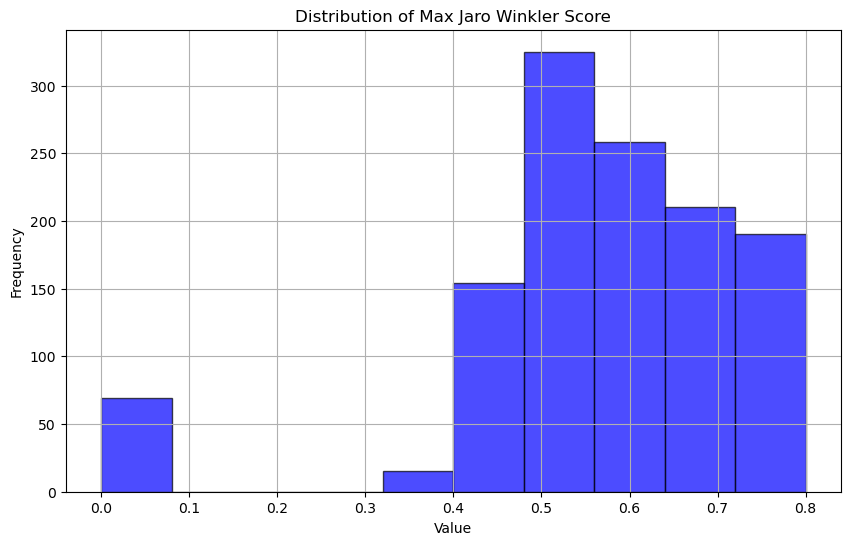

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[df_cleaned['JW_Max_score']<0.8]['JW_Max_score'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Max Jaro Winkler Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
df_cleaned.to_csv('go2b_result_nmmatching.csv')

In [39]:
def comment(thresh):
    cnt_declines=len(df_cleaned[df_cleaned['JW_Max_score']<thresh])
    cnt_total=5103443
    prorated_declines=int(cnt_declines*cnt_total/20000)
    pct=round(cnt_declines/20000,3)*100
    print(f"Using JW score {thresh}, est. # of ACH declines: {prorated_declines} based on 2024 total volumes, pct: {pct}")

In [41]:
for i in [0.9,0.8,0.7,0.6]:
    comment(i)

Using JW score 0.9, est. # of ACH declines: 467220 based on 2024 total volumes, pct: 9.2
Using JW score 0.8, est. # of ACH declines: 311565 based on 2024 total volumes, pct: 6.1
Using JW score 0.7, est. # of ACH declines: 254151 based on 2024 total volumes, pct: 5.0
Using JW score 0.6, est. # of ACH declines: 181937 based on 2024 total volumes, pct: 3.5999999999999996


In [42]:
df_cleaned[df_cleaned['JW_Max_score']<0.8].to_csv('go2b_result_nmmatching_lessthan8.csv')